<a href="https://colab.research.google.com/github/kayodeolusanya/Data-Scientist-Salaries-Python-/blob/main/Data_Scientist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/ds_salaries.csv')
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [ ]:
# To check for duplicates
df.duplicated().sum()

0

In [ ]:
# To drop  the feature we dont need (Unnamed: 0)
df = df.drop(['Unnamed: 0'], axis=1)
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [ ]:
df.shape


(607, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [ ]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


In [ ]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

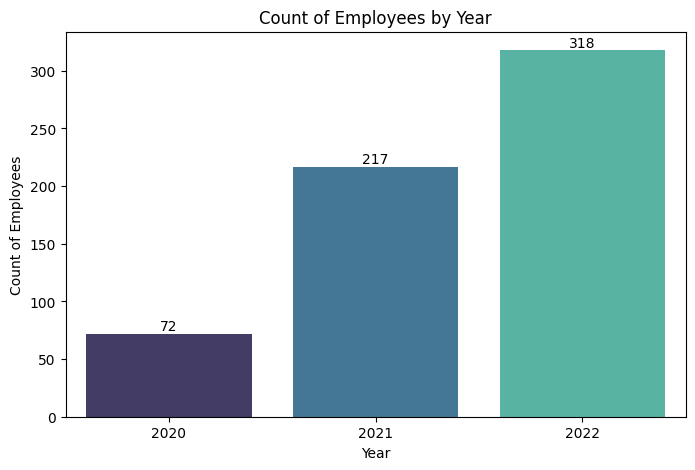

In [ ]:
plt.figure(figsize=(8,5))
wy = sns.countplot(x='work_year', data=df, palette='mako')
values = df['work_year'].value_counts(ascending= True).values
wy.bar_label(container=wy.containers[0], labels=values);
plt.xlabel('Year')
plt.ylabel('Count of Employees')
plt.title('Count of Employees by Year');

Text(0.5, 1.0, 'Count of Employees by Experience')

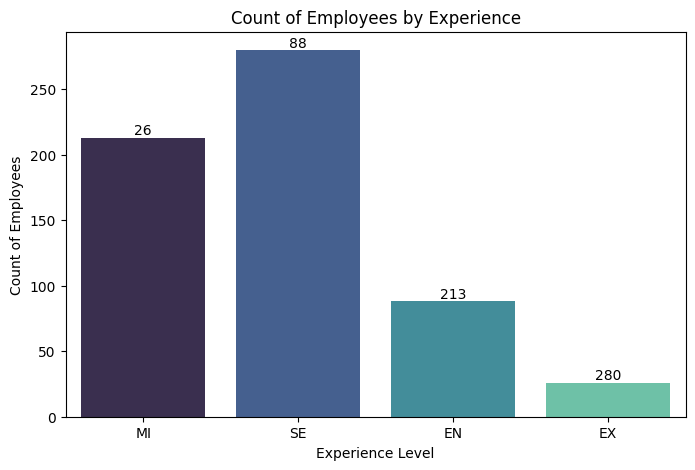

In [58]:
plt.figure(figsize=(8,5))
el = sns.countplot(x='experience_level', data=df, palette='mako')
values = df['experience_level'].value_counts(ascending=True).values
el.bar_label(container=el.containers[0], labels=values);
plt.xlabel('Experience Level')
plt.ylabel('Count of Employees')
plt.title('Count of Employees by Experience')

Text(0.5, 1.0, 'Employees by Job Title')

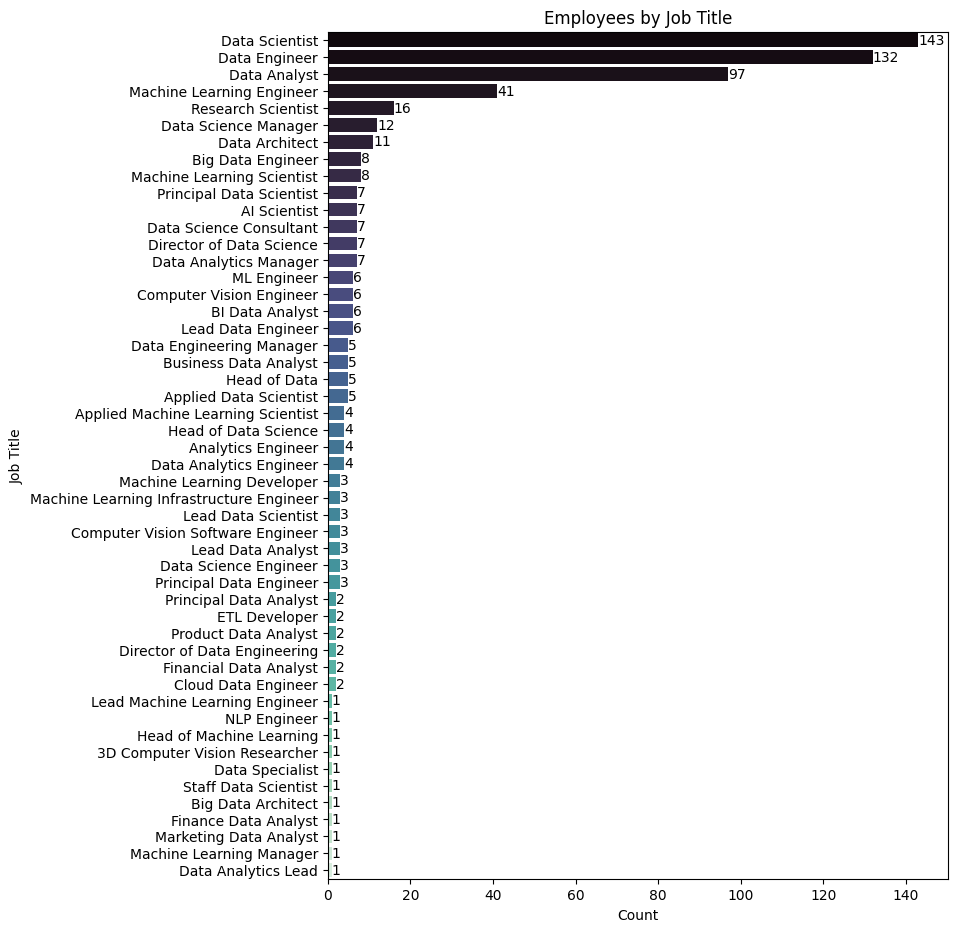

In [86]:
plt.figure(figsize=(8,11))
jt = sns.countplot(y=df["job_title"], order=df["job_title"].value_counts(ascending= False).index, palette='mako')
values = df['job_title'].value_counts(ascending=False).values
jt.bar_label(container=jt.containers[0], labels=values);
plt.ylabel('Job Title')
plt.xlabel('Count')
plt.title('Employees by Job Title')

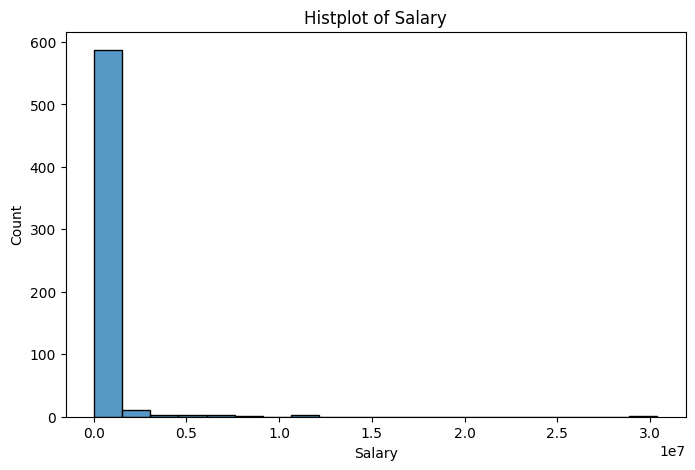

In [115]:
plt.figure(figsize=(8, 5))
sns.histplot(df['salary'], bins=20)
plt.title('Histplot of Salary')
plt.xlabel('Salary')
plt.show()

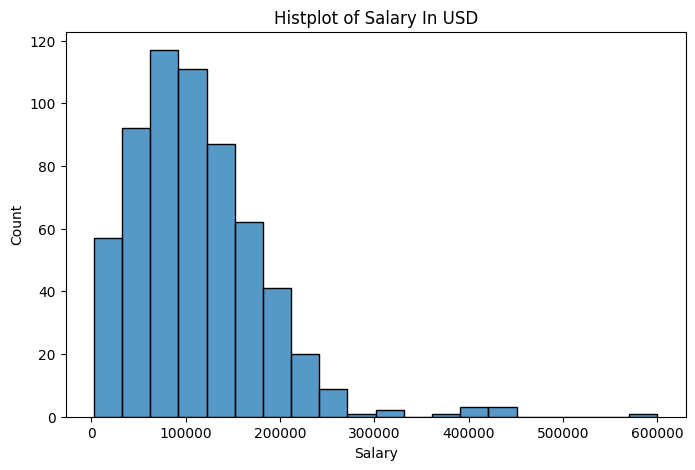

In [141]:
plt.figure(figsize=(8, 5))
sns.histplot(df['salary_in_usd'], bins=20)
plt.title('Histplot of Salary In USD')
plt.xlabel('Salary')
plt.show()

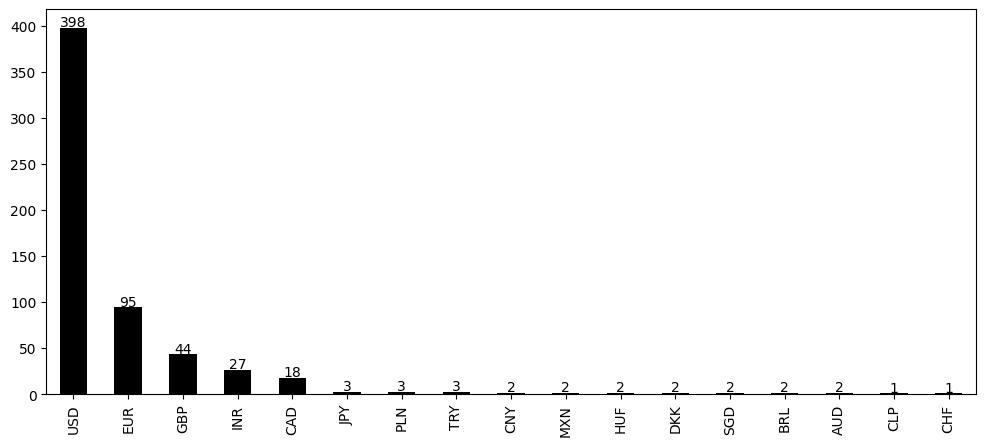

In [144]:
plt.figure(figsize=(12,5))
counts= df['salary_currency'].value_counts()
counts.plot(kind='bar', cmap=plt.cm.gist_gray)
for i, v in enumerate(counts):
  plt.text(i, v+1, str(v), ha='center')
plt.show()

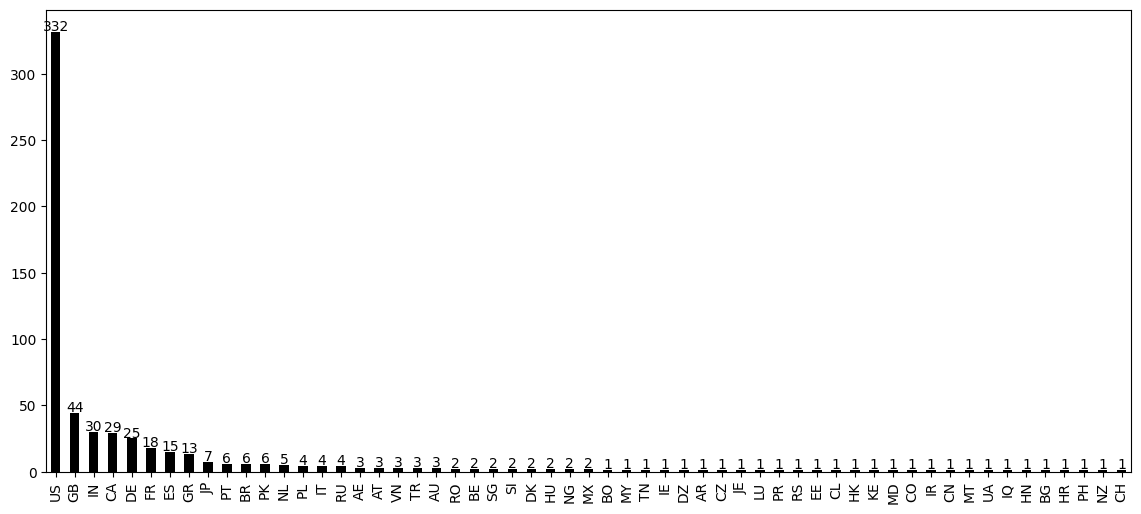

In [155]:
plt.figure(figsize=(14,6))
counts= df['employee_residence'].value_counts()
counts.plot(kind='bar', cmap=plt.cm.gist_gray)
for i, v in enumerate(counts):
  plt.text(i, v+1, str(v), ha='center')
plt.show()

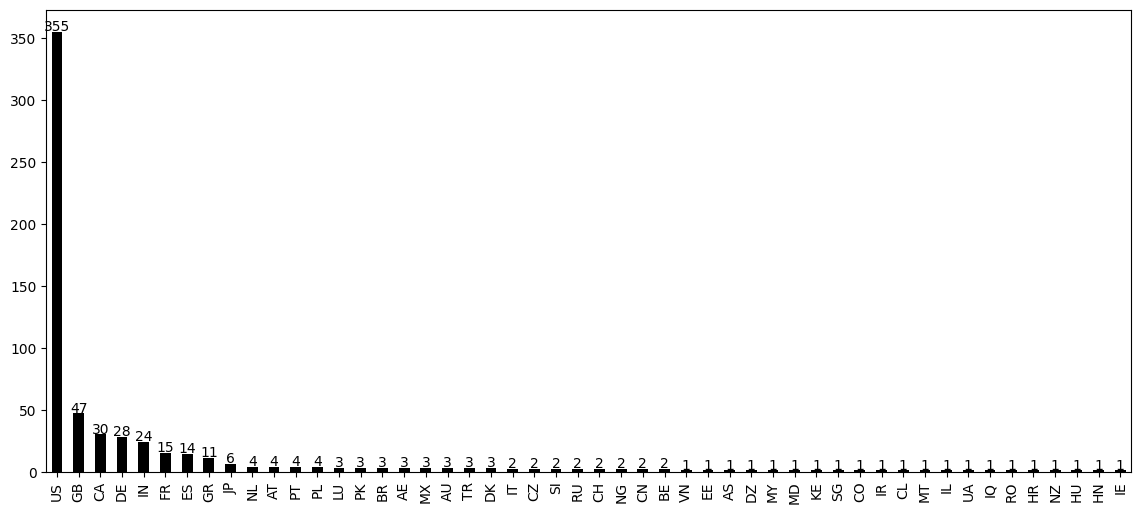

In [165]:
plt.figure(figsize=(14,6))
counts= df['company_location'].value_counts()
counts.plot(kind='bar', cmap=plt.cm.gist_gray)
for i, v in enumerate(counts):
  plt.text(i, v+1, str(v), ha='center')
plt.show()

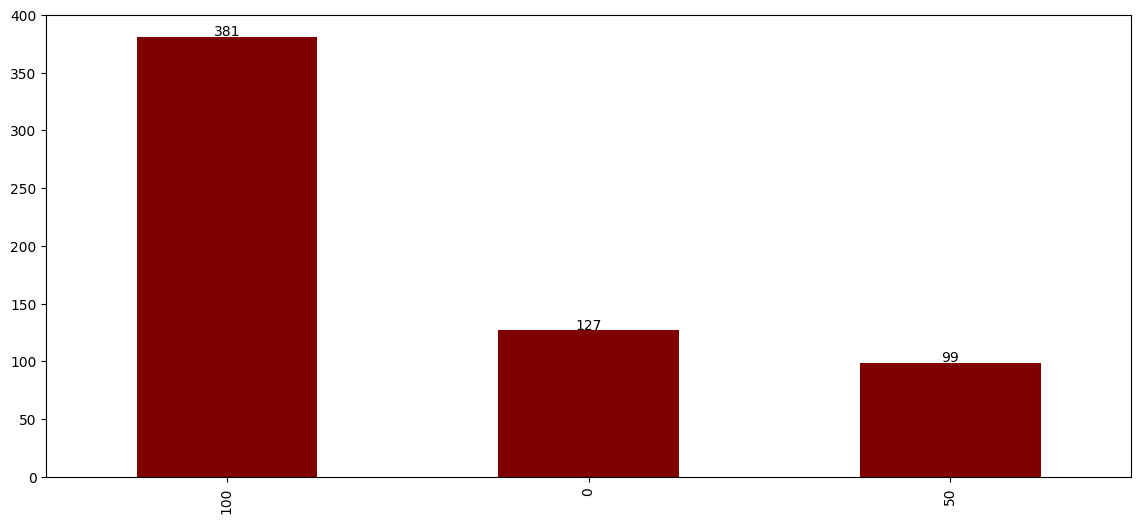

In [162]:
plt.figure(figsize=(14,6))
counts= df['remote_ratio'].value_counts()
counts.plot(kind='bar', cmap=plt.cm.seismic_r)
for i, v in enumerate(counts):
  plt.text(i, v+1, str(v), ha='center')
plt.show()

M    326
L    198
S     83
Name: company_size, dtype: int64


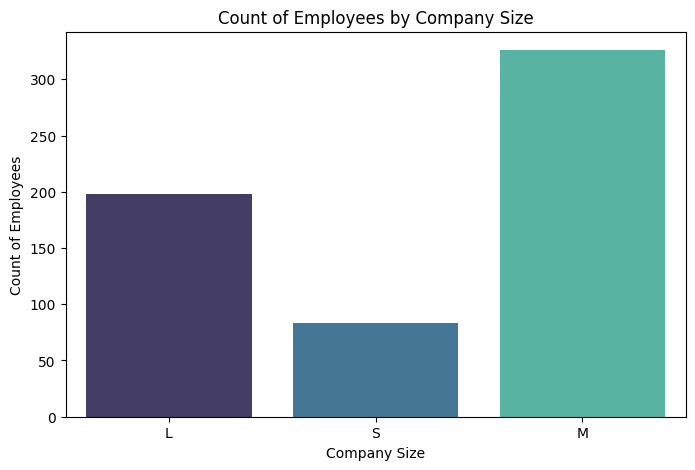

In [178]:
plt.figure(figsize=(8,5))
css = sns.countplot(x='company_size', data=df, palette='mako')
plt.xlabel('Company Size')
plt.ylabel('Count of Employees')
plt.title('Count of Employees by Company Size')
print(df['company_size'].value_counts());
plt.show()


In [91]:
print(df['salary'].value_counts())

100000     18
80000      18
120000     15
60000      15
150000     14
           ..
256000      1
39600       1
1335000     1
52500       1
129000      1
Name: salary, Length: 272, dtype: int64


In [167]:
df['company_size'].unique()

array(['L', 'S', 'M'], dtype=object)